In [1]:
print("NAME: THARUN V K")
print("REG NO : 212223230231")

NAME: THARUN V K
REG NO : 212223230231


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print("\n\n")
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Splitting the data into features and target variable
x = data.drop('price', axis=1)
y = data['price']

In [6]:
# Standardizing the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).ravel()

In [7]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
# Creating the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

In [9]:
# Fitting the model on the training data
sgd_model.fit(x_train, y_train)

SGDRegressor()

In [10]:
# Making predictions
y_pred = sgd_model.predict(x_test)

In [11]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
# Print evaluation metrics
print()
print()
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Mean Squared Error: 0.1349113876669124
R-squared Score: 0.8580720049575348


In [13]:
# Print model coefficients
print("\n\n")
print("Model Coefficients")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)




Model Coefficients
Coefficients: [ 0.05441419  0.1026206  -0.01219246  0.20095241  0.01456015  0.16708596
  0.3262707  -0.04481445 -0.08037639 -0.0131755   0.12859306 -0.00200842
 -0.00444058 -0.02462799 -0.01936565  0.00549132  0.01166189 -0.04657532
 -0.10349784 -0.02097677 -0.07231566 -0.05132663  0.07443693  0.22421379
  0.00950419 -0.08543925  0.09163791 -0.00079591  0.00745149  0.00394649
 -0.04189896 -0.15510048 -0.08926775  0.00167481 -0.03778604  0.00394649
 -0.01772106  0.00357399  0.01936565  0.00167481 -0.0383534  -0.03824967
 -0.01809262]
Intercept: [-0.02392873]


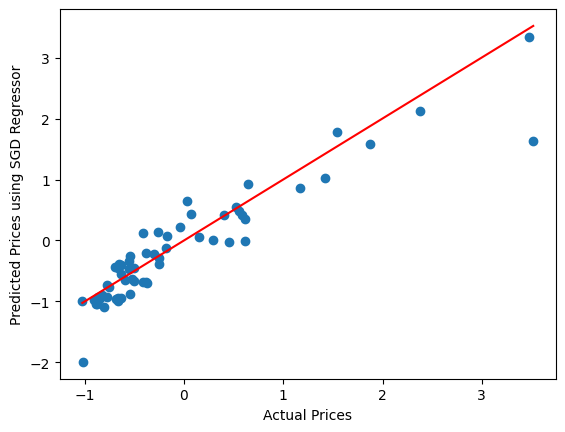

In [14]:
# Visualizing actual vs predicted prices
print("\n\n")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()

In [16]:
print("NAME: THARUN V K")
print("REG NO : 212223230231")

NAME: THARUN V K
REG NO : 212223230231
